WeatherPy

Analysis

As we already knew, and clearly demonstrated here, temperatures near the equator are higher. Temperatures are cooler in the Northern hemisphere where latitudes are greater than zero while temperatures are hotter in the Southern hemisphere where latitudes are less than zero. 

There was little correlation between humidity and latitude. A correlation between cloudiness or wind speed and latitude was not in evidence. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
# Create a data frame from cities list
cities_dict = {
    "city": cities,
    "country": countries
    }

weather_df = pd.DataFrame(cities_dict)

# Add columns
weather_df["id"] = ""
weather_df["latitude"] = ""
weather_df["longitude"] = ""
weather_df["temp_f"] = ""
weather_df["humidity"] = ""
weather_df["cloudiness"] = ""
weather_df["wind_speed"] = ""
weather_df["date"] = ""

weather_df.head()

,city,country,id,latitude,longitude,temp_f,humidity,cloudiness,wind_speed,date
0,lebu,cl,,,,,,,,
1,emba,kz,,,,,,,,
2,port alfred,za,,,,,,,,
3,labuhan,id,,,,,,,,
4,qaanaaq,gl,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# create a params dict that will be updated with new city each iteration
units = "imperial"

params = {
    'appid': api_key,
    'units': units
}

# Loop through weather_df and run a data search for each city
for index, row in weather_df.iterrows():
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    city = row['city']
    country = row['country']

    # update address key value
    params['q'] = f"{city},{country}"

    # make request
    print(f"Retrieving results for {city}, {country} (country code).")
    weather_response = requests.get(base_url, params)
    
    
    # convert to json
    weather_response = weather_response.json()

    # pull data from api
    try:
        #print(f"City id number: {weather_response['id']}.")
        
        weather_df.loc[index, "id"] = weather_response['id']
        weather_df.loc[index, "latitude"] = weather_response['coord']['lat']
        weather_df.loc[index, "longitude"] = weather_response['coord']['lon']
        weather_df.loc[index, "temp_f"] = weather_response['main']['temp']
        weather_df.loc[index, "humidity"] = weather_response['main']['humidity']
        weather_df.loc[index, "cloudiness"] = weather_response['clouds']['all']
        weather_df.loc[index, "wind_speed"] = weather_response['wind']['speed']
        weather_df.loc[index, "date"] = weather_response['dt']
        
    except (KeyError, IndexError):
        print("City not found. Skipping.")
    
    print("------------")
#     break

Retrieving results for lebu, cl (country code).
------------
Retrieving results for emba, kz (country code).
City not found. Skipping.
------------
Retrieving results for port alfred, za (country code).
------------
Retrieving results for labuhan, id (country code).
------------
Retrieving results for qaanaaq, gl (country code).
------------
Retrieving results for tiksi, ru (country code).
------------
Retrieving results for sucre, bo (country code).
------------
Retrieving results for linxia, cn (country code).
------------
Retrieving results for faya, td (country code).
City not found. Skipping.
------------
Retrieving results for nikolskoye, ru (country code).
------------
Retrieving results for nanortalik, gl (country code).
------------
Retrieving results for avarua, ck (country code).
------------
Retrieving results for punta arenas, cl (country code).
------------
Retrieving results for barrow, us (country code).
------------
Retrieving results for sao filipe, cv (country code).

------------
Retrieving results for belushya guba, ru (country code).
City not found. Skipping.
------------
Retrieving results for caravelas, br (country code).
------------
Retrieving results for mar del plata, ar (country code).
------------
Retrieving results for chuy, uy (country code).
------------
Retrieving results for isangel, vu (country code).
------------
Retrieving results for saint-philippe, re (country code).
------------
Retrieving results for bethel, us (country code).
------------
Retrieving results for suining, cn (country code).
------------
Retrieving results for inirida, co (country code).
------------
Retrieving results for martapura, id (country code).
------------
Retrieving results for esperance, au (country code).
------------
Retrieving results for cape town, za (country code).
------------
Retrieving results for laguna, br (country code).
City not found. Skipping.
------------
Retrieving results for fortuna, us (country code).
------------
Retrieving result

------------
Retrieving results for cherskiy, ru (country code).
------------
Retrieving results for burley, us (country code).
------------
Retrieving results for qui nhon, vn (country code).
City not found. Skipping.
------------
Retrieving results for yaan, cn (country code).
City not found. Skipping.
------------
Retrieving results for mayskiy, ru (country code).
------------
Retrieving results for ust-kuyga, ru (country code).
------------
Retrieving results for herat, af (country code).
------------
Retrieving results for kaitangata, nz (country code).
------------
Retrieving results for katsuura, jp (country code).
------------
Retrieving results for eureka, us (country code).
------------
Retrieving results for asosa, et (country code).
------------
Retrieving results for buluang, ph (country code).
------------
Retrieving results for taree, au (country code).
------------
Retrieving results for meyungs, pw (country code).
City not found. Skipping.
------------
Retrieving resul

------------
Retrieving results for makakilo city, us (country code).
------------
Retrieving results for abha, sa (country code).
------------
Retrieving results for montrose, us (country code).
------------
Retrieving results for vanimo, pg (country code).
------------
Retrieving results for vilhena, br (country code).
------------
Retrieving results for qaqortoq, gl (country code).
------------
Retrieving results for oranjemund, na (country code).
------------
Retrieving results for kualakapuas, id (country code).
------------
Retrieving results for devils lake, us (country code).
------------
Retrieving results for muros, es (country code).
------------
Retrieving results for narsaq, gl (country code).
------------
Retrieving results for albert, fr (country code).
------------
Retrieving results for san rafael, ar (country code).
------------
Retrieving results for novobelokatay, ru (country code).
------------
Retrieving results for tabou, ci (country code).
------------
Retrievin

------------
Retrieving results for korla, cn (country code).
------------
Retrieving results for paita, pe (country code).
------------
Retrieving results for cayenne, gf (country code).
------------
Retrieving results for oktyabrskoye, ru (country code).
------------
Retrieving results for gorno-chuyskiy, ru (country code).
City not found. Skipping.
------------
Retrieving results for temaraia, ki (country code).
City not found. Skipping.
------------
Retrieving results for tasbuget, kz (country code).
City not found. Skipping.
------------
Retrieving results for karratha, au (country code).
------------
Retrieving results for zhanatas, kz (country code).
City not found. Skipping.
------------
Retrieving results for yakeshi, cn (country code).
------------
Retrieving results for dien bien, vn (country code).
City not found. Skipping.
------------
Retrieving results for lorengau, pg (country code).
------------
Retrieving results for salta, ar (country code).
------------
Retrieving r

------------
Retrieving results for pareora, nz (country code).
------------
Retrieving results for saint-joseph, re (country code).
------------
Retrieving results for tambacounda, sn (country code).
------------
Retrieving results for pandan, ph (country code).
------------
Retrieving results for tura, ru (country code).
------------
Retrieving results for elat, il (country code).
City not found. Skipping.
------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Visualize dataframe
weather_df.head(11)

,city,country,id,latitude,longitude,temp_f,humidity,cloudiness,wind_speed,date
0,lebu,cl,3883457,-37.62,-73.65,55.2,92,44,21.5,1553475105
1,emba,kz,,,,,,,,
2,port alfred,za,964432,-33.59,26.89,71.01,95,24,5.99,1553474810
3,labuhan,id,1641899,-2.54,115.51,78.87,85,36,1.36,1553474999
4,qaanaaq,gl,3831208,77.48,-69.36,-25.36,74,0,6.96,1553474907
5,tiksi,ru,2015306,71.64,128.87,-7.72,61,44,3.94,1553475107
6,sucre,bo,3903987,-19.05,-65.26,51.78,85,36,2.15,1553475107
7,linxia,cn,1803331,35.6,103.21,14.07,54,0,2.15,1553475108
8,faya,td,,,,,,,,
9,nikolskoye,ru,546105,59.7,30.79,32.92,74,0,6.71,1553475094


In [7]:
# Clean data
weather_clean = weather_df

# Replace blanks with NaN
weather_clean.replace('', np.nan, inplace=True)

# Delete rows with NaNs
weather_clean.dropna(subset=["latitude", "longitude", "temp_f", "humidity", "cloudiness", "wind_speed"], inplace=True)

print(weather_clean.count())

# Save dataframe to csv
weather_clean.to_csv("cities_weather.csv", index=False, header=True)

city          523
country       523
id            523
latitude      523
longitude     523
temp_f        523
humidity      523
cloudiness    523
wind_speed    523
date          523
dtype: int64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

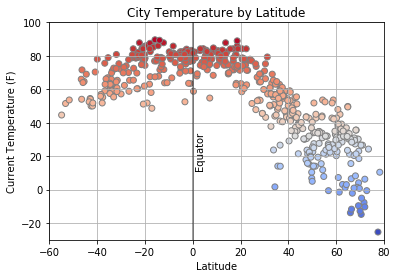

In [11]:
# Set x and y axes
x_axis = weather_clean["latitude"]
y_temp = weather_clean["temp_f"]
plt.scatter(x_axis, y_temp, marker="o", c=y_temp, edgecolors="grey", cmap='coolwarm')

# Format chart
plt.title("City Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Current Temperature (F)")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([-30, 100])

# Save figure
plt.savefig("temp_lat.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

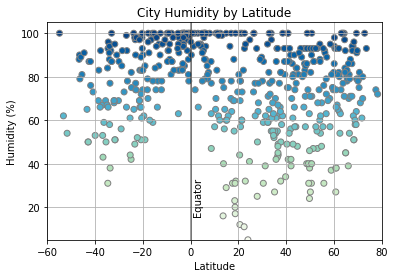

In [12]:
# Set y axis (x is the same for all plots)
y_hum = weather_clean["humidity"]
plt.scatter(x_axis, y_hum, marker="o", c=y_hum, edgecolors="grey", cmap='GnBu')

# Format chart
plt.title("City Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([5, 105])

# Save figure
plt.savefig("humidity_lat.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

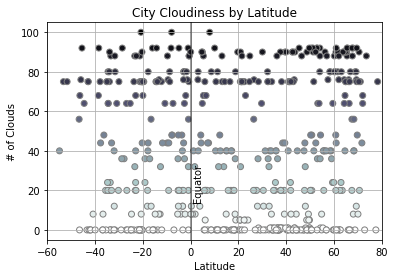

In [13]:
# Set y axis (x is the same for all plots)
y_clouds = weather_clean["cloudiness"]
plt.scatter(x_axis, y_clouds, marker="o", c=y_clouds, edgecolors="grey", cmap='bone_r')

# Format chart
plt.title("City Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("# of Clouds")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([-5, 105])

# Save figure
plt.savefig("clouds_lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

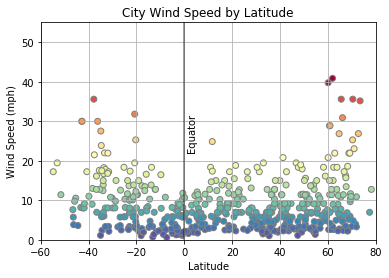

In [14]:
# Set y axis (x is the same for all plots)
y_wind = weather_clean["wind_speed"]
plt.scatter(x_axis, y_wind, marker="o", c=y_wind, edgecolors="grey", cmap='Spectral_r')

# Format chart
plt.title("City Wind Speed by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.axvline(0, color = 'black', alpha = 0.5, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)
plt.xlim([-60, 80])
plt.ylim([0, 55])

# Save figure
plt.savefig("wind_lat.png")

# Show plot
plt.show()